In [1]:
import sys, os
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append(os.path.abspath(os.path.join('..','data_processing')))
sys.path.append(os.path.abspath(os.path.join('..','models')))

# Single Task evaluation

In [ ]:
from preprocessing import test_data

In [4]:
def evaluate_face_classification_model(model_path, test_dataset, threshold=0.5):
    # Load the model
    model = tf.keras.models.load_model(model_path)
    print(f"Model loaded from {model_path}")

    # Prepare test dataset for predictions
    all_images = []
    all_labels = []

    for images, labels in test_dataset.unbatch():
        all_images.append(images.numpy())
        all_labels.append(labels.numpy())

    # Convert to numpy arrays
    all_images = np.array(all_images)
    all_labels = np.array(all_labels)

    # Predict on the entire test dataset
    y_pred_probabilities = model.predict(all_images, verbose=1)

    # Adjust the decision threshold
    y_pred = (y_pred_probabilities.flatten() >= threshold).astype(int)
    y_true = all_labels.astype(int)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_true, y_pred)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

    # Generate classification report
    class_labels = ['Non-Face', 'Face']
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=0))

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

    print("\nConfusion Matrix (Percentages):")
    print(conf_matrix_percentage)

    # Plot confusion matrix in percentages
    def plot_confusion_matrix_percentage(cm, class_names):
        plt.figure(figsize=(6, 6))
        plt.imshow(cm, interpolation='nearest', cmap='Blues')
        plt.title("Confusion Matrix (Percentages)")
        plt.colorbar()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)

        # Add labels to each cell
        threshold = cm.max() / 2
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, f"{cm[i, j]:.2f}%",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black")

        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()

    plot_confusion_matrix_percentage(conf_matrix_percentage, class_labels)
    plt.show()

    # Precision, Recall, and F1 Score
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred)

    print(f"\nPrecision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")


Model loaded from ../results/Single Task/MobileNet/MobileNet.h5
47/47 [==============================] - 3s 49ms/step
Test Accuracy: 99.53%

Classification Report:
              precision    recall  f1-score   support

    Non-Face       0.99      1.00      1.00       750
        Face       1.00      0.99      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


Confusion Matrix (Percentages):
[[99.86666667  0.13333333]
 [ 0.8        99.2       ]]


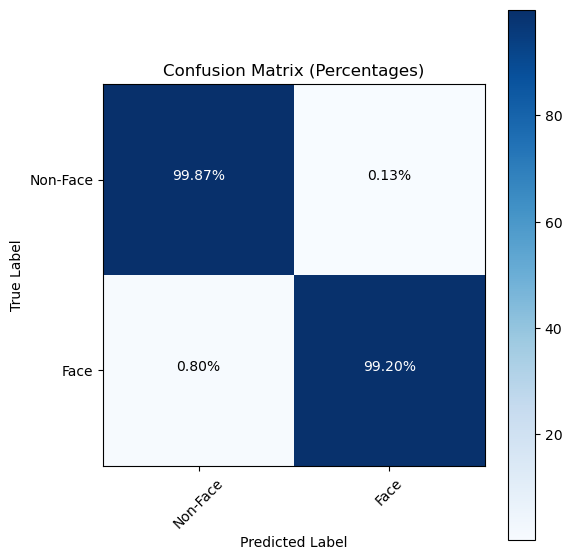


Precision: 1.00
Recall: 0.99
F1 Score: 1.00


In [9]:
evaluate_face_classification_model('../results/Single Task/resNet50/resNet50.h5',test_data)

Model loaded from ../results/Single Task/inception/inception.h5
47/47 [==============================] - 11s 137ms/step
Test Accuracy: 99.87%

Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      1.00      1.00       750
        Face       1.00      1.00      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


Confusion Matrix (Percentages):
[[100.           0.        ]
 [  0.26666667  99.73333333]]


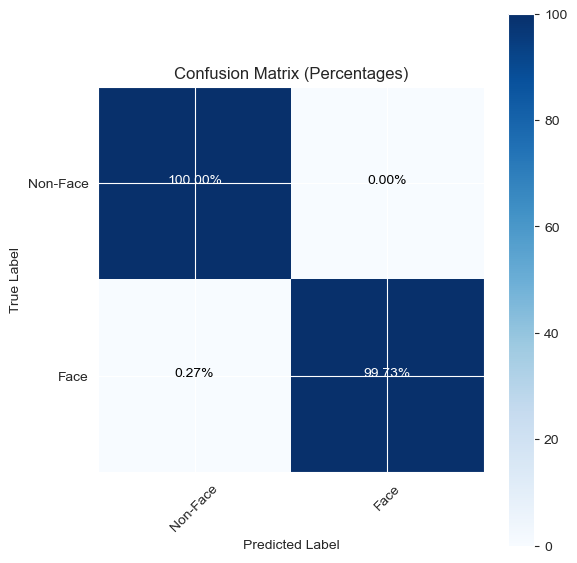


Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [5]:
evaluate_face_classification_model('../results/Single Task/inception/inception.h5',test_data)

Model loaded from ../results/Single Task/resNet50/resNet50.h5
47/47 [==============================] - 8s 103ms/step
Test Accuracy: 99.87%

Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      1.00      1.00       750
        Face       1.00      1.00      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


Confusion Matrix (Percentages):
[[100.           0.        ]
 [  0.26666667  99.73333333]]


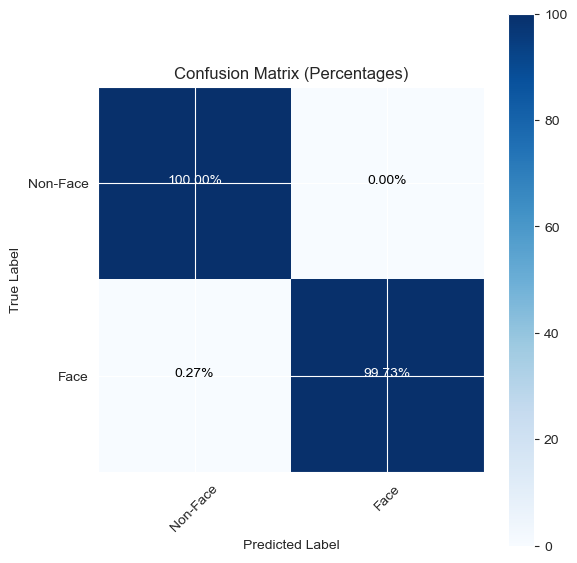


Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [5]:
evaluate_face_classification_model('../results/Single Task/resNet50/resNet50.h5',test_data)

Model loaded from ../results/Single Task/EfficientNetB0/EfficientNetB0.h5
47/47 [==============================] - 7s 60ms/step
Test Accuracy: 99.67%

Classification Report:
              precision    recall  f1-score   support

    Non-Face       0.99      1.00      1.00       750
        Face       1.00      0.99      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


Confusion Matrix (Percentages):
[[100.           0.        ]
 [  0.66666667  99.33333333]]


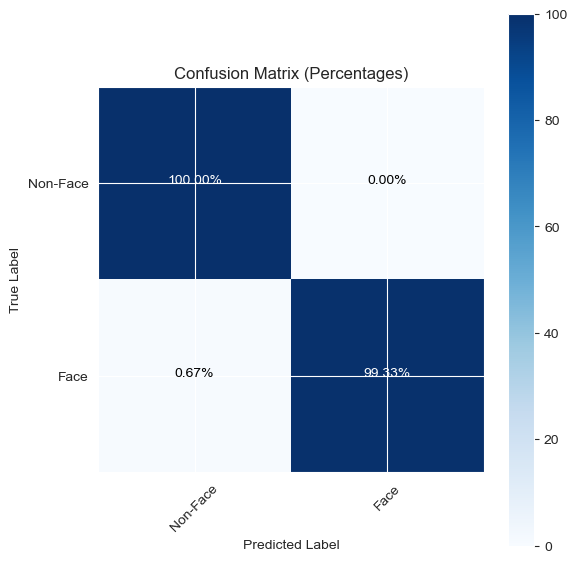


Precision: 1.00
Recall: 0.99
F1 Score: 1.00


In [5]:
evaluate_face_classification_model('../results/Single Task/EfficientNetB0/EfficientNetB0.h5',test_data)

Model loaded from ../results/Single Task/EfficientNetB3/EfficientNetB3.h5
47/47 [==============================] - 11s 106ms/step
Test Accuracy: 99.80%

Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      1.00      1.00       750
        Face       1.00      1.00      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


Confusion Matrix (Percentages):
[[99.86666667  0.13333333]
 [ 0.26666667 99.73333333]]


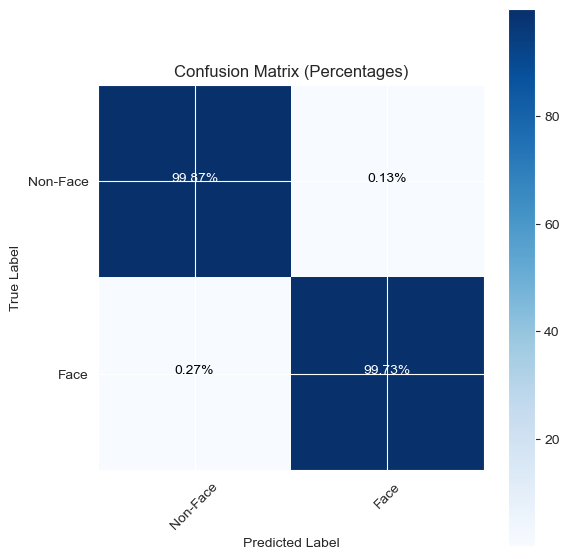


Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [6]:
evaluate_face_classification_model('../results/Single Task/EfficientNetB3/EfficientNetB3.h5',test_data)


Model loaded from ../results/Single Task/MobileNet_Gan/MobileNet_Gan.h5
47/47 [==============================] - 5s 52ms/step
Test Accuracy: 99.53%

Classification Report:
              precision    recall  f1-score   support

    Non-Face       0.99      1.00      1.00       750
        Face       1.00      0.99      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


Confusion Matrix (Percentages):
[[99.73333333  0.26666667]
 [ 0.66666667 99.33333333]]


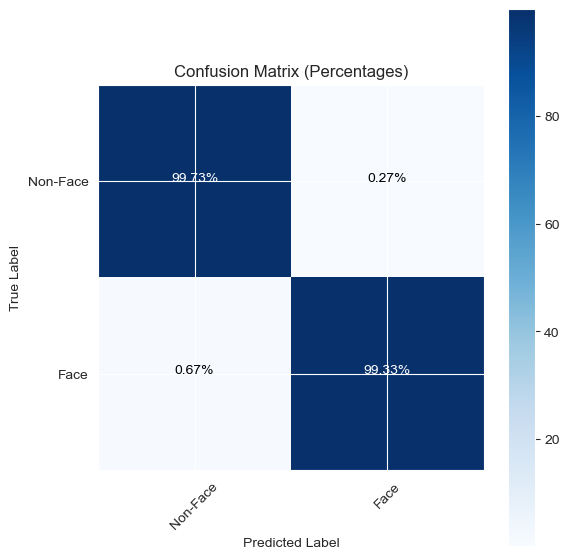


Precision: 1.00
Recall: 0.99
F1 Score: 1.00


In [5]:
evaluate_face_classification_model('../results/Single Task/MobileNet_Gan/MobileNet_Gan.h5',test_data)

Model loaded from ../results/Single Task/EfficientNetB0_Gan/EfficientNetB0_Gan.h5
47/47 [==============================] - 6s 61ms/step
Test Accuracy: 99.60%

Classification Report:
              precision    recall  f1-score   support

    Non-Face       0.99      1.00      1.00       750
        Face       1.00      0.99      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


Confusion Matrix (Percentages):
[[99.86666667  0.13333333]
 [ 0.66666667 99.33333333]]


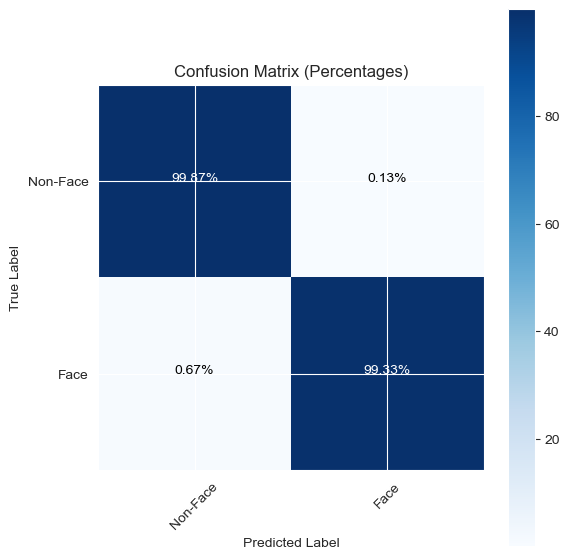


Precision: 1.00
Recall: 0.99
F1 Score: 1.00


In [6]:
evaluate_face_classification_model('../results/Single Task/EfficientNetB0_Gan/EfficientNetB0_Gan.h5',test_data)